In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
print("Cargar los datos")

df = pd.read_csv("USA_Housing.csv")

x = df.drop(['Price', 'Address'], axis=1)
y = df['Price']

print(f"Dataset {df.shape[0]} filas, {df.shape[1]} columnas")

Cargar los datos
Dataset 5000 filas, 7 columnas


In [50]:
print("2. DIVIDIENDO DATOS")

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"Dataset de entrenamiento {X_train.shape[0]} filas")
print(f"Dataset de prueba {X_test.shape[0]} filas")

2. DIVIDIENDO DATOS
Dataset de entrenamiento 4000 filas
Dataset de prueba 1000 filas


In [51]:
print("3, Entenando el modelo")
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)

print("Modelo entrenado con exitosamente")

3, Entenando el modelo
Modelo entrenado con exitosamente


In [52]:
print("4. Evaluando el modelo")

y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadratico medio: {mse}")
print(f"R cuadrado: {r2}")

4. Evaluando el modelo
Error cuadratico medio: 10089009300.893984
R cuadrado: 0.9179971706834332


In [53]:
print("5. Guardando el modelo")

import pickle

with open('model_regression_lineal_USAHousing.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

print("Modelo guardado con exito")

5. Guardando el modelo
Modelo guardado con exito


In [54]:
print("Hacer una prediccion")
def hacer_prediccion(input_data):
    prediccion = pipeline.predict(input_data)
    return prediccion

datos_ejemplo = pd.DataFrame({
    'Avg. Area Income': [50000],
    'Avg. Area House Age': [15],
    'Avg. Area Number of Rooms': [3],
    'Avg. Area Number of Bedrooms': [1],
    'Area Population': [1000]
})

prediccion = hacer_prediccion(datos_ejemplo)
print(f"Prediccion: {prediccion[0]:.2f}$")

Hacer una prediccion
Prediccion: 1294117.33$


generar grafica


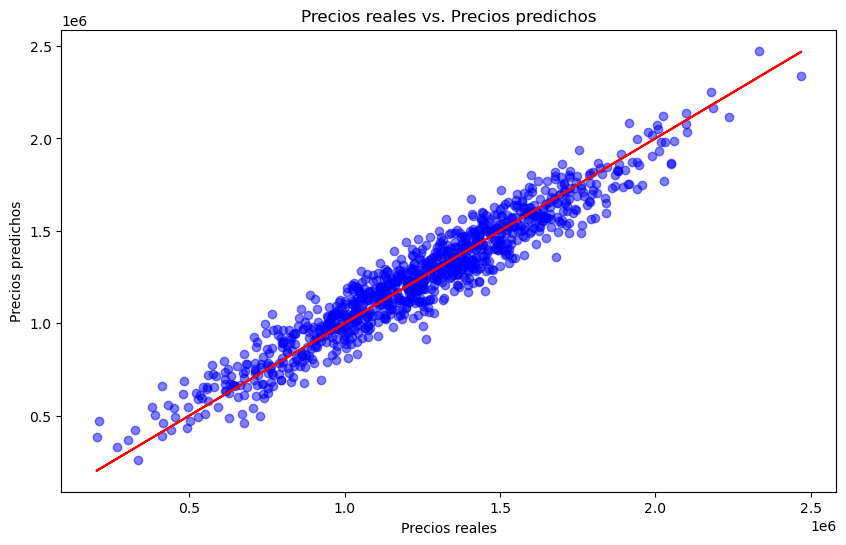

In [59]:
print("generar grafica")

plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot(y_test, y_test, color='red')
plt.xlabel("Precios reales")
plt.ylabel("Precios predichos")
plt.title("Precios reales vs. Precios predichos")
plt.show()